<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/20210324_Competition_%EC%97%84%EC%A0%95%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competition

##자동차 모델 분류

* 조건
- Categorical Classification(몇 개로 분류되는지도 확인)
- Metric -> 'Accuracy'
- 프로젝트와 관련된 의견을 작성할 것
- 11시 20분까지 메일로 제출

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. DataSet Load

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'

-rw------- 1 root root 82003032 Mar 24 00:15 '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'


> ## 1) 'DataSet.pkl'

* 압축형식 : 'Gzip'

In [4]:
import pandas as pd

url = '/content/drive/My Drive/Colab Notebooks/datasets/DataSet.pkl'
DF = pd.read_pickle(url, compression = 'gzip')

DF.shape

(24916, 2701)

> ## 2) DataFrame Information

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24916 entries, 0 to 24915
Columns: 2701 entries, 0 to 2700
dtypes: object(2701)
memory usage: 513.4+ MB


In [6]:
DF.head() #마지막 열(2700)이 자동차 모델 네임

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2661,2662,2663,2664,2665,2666,2667,2668,2669,2670,2671,2672,2673,2674,2675,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685,2686,2687,2688,2689,2690,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,230,236,252,226,232,248,220,227,245,214,223,240,212,220,241,206,219,238,204,216,240,199,215,238,199,215,241,193,213,238,189,208,238,183,207,235,181,204,236,177,...,28,28,28,23,24,26,18,22,23,18,21,26,17,22,26,14,21,27,13,20,26,11,16,20,15,20,23,20,21,25,22,24,23,37,35,36,55,54,52,G80스포츠
1,235,238,243,251,254,255,251,255,255,242,249,255,239,246,255,248,255,255,247,255,255,238,248,255,246,255,255,249,255,255,251,255,255,249,250,255,248,248,250,251,...,54,59,62,46,53,59,40,47,55,36,45,54,36,44,55,38,46,59,40,48,59,33,39,51,38,45,53,42,45,50,51,52,54,69,70,65,124,123,118,G80스포츠
2,94,112,134,85,103,125,76,97,118,80,101,122,95,116,137,109,130,151,114,137,155,114,137,155,112,133,150,121,143,157,86,105,120,66,86,97,127,145,157,189,...,41,53,65,41,54,63,51,64,73,64,77,86,66,79,88,55,68,76,42,55,63,51,64,70,50,63,69,48,62,65,52,66,69,67,78,82,80,91,95,G80스포츠
3,80,88,90,68,76,78,79,83,84,122,126,125,178,178,178,211,211,209,221,217,214,216,213,208,223,218,214,213,208,202,204,201,194,205,202,195,208,208,200,209,...,53,64,84,54,65,85,52,64,80,55,67,81,66,79,88,77,90,99,84,97,105,64,77,83,63,76,82,63,76,84,84,97,105,82,92,102,104,114,124,G80스포츠
4,215,229,194,212,222,195,210,217,201,217,218,213,226,223,232,229,221,236,222,211,227,213,201,211,213,203,204,216,209,199,221,215,201,218,217,197,210,211,195,205,...,31,47,60,42,58,71,51,67,80,58,72,83,61,75,86,62,76,85,63,77,86,87,101,110,94,108,117,84,99,106,94,109,116,99,114,119,81,96,101,G80스포츠


In [7]:
DF[2700].value_counts() 
#자동차 모델은 34개로 분류되어있음 : 차를 잘 알지못하므로 그대로 34개로 분류하기로 함

투싼            1931
i30           1296
싼타페           1282
그랜저HG240       940
KONA 1         840
그랜저            770
소나타 YF         762
소나타 뉴라이즈       725
G90            714
소나타 하이브리드      664
아슬란            659
더뉴아반떼AD        653
소나타 LF         653
제네시스G380       652
소나타 LPI        646
엑센트            641
아반떼 XD         639
제네시스 G80       638
아반떼MD          636
소나타            635
아이오닉 하이브리드     633
투싼1            628
팰리세이드          628
아반떼AD          627
그랜저 IG         627
아이오닉 일렉트릭      620
벨로스터           620
에쿠스            619
스타렉스           614
맥스크루즈          605
G80스포츠         605
소나타 NF         605
제네시스 G70       600
더뉴그랜드스타렉스      509
Name: 2700, dtype: int64

> ## 3) 'X', 'y' 분리

In [8]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]

X.shape, y.shape

((24916, 2700), (24916,))

> ## 4) Visualization

* '0'번 인덱스 label 및 이미지

G80스포츠


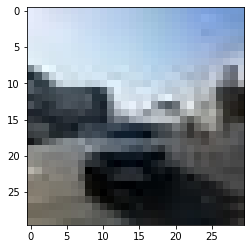

In [9]:
import numpy as np
import matplotlib.pyplot as plt

print(y.iloc[0])

plt.imshow(X.iloc[0].values.astype(np.int).reshape(30,30,3))
plt.show()

* '200'번 인덱스 label 및 이미지

G80스포츠


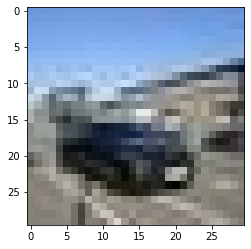

In [10]:
print(y.iloc[200])

plt.imshow(X.iloc[200].values.astype(np.int).reshape(30,30,3))
plt.show()

* '400'번 인덱스 label 및 이미지

G80스포츠


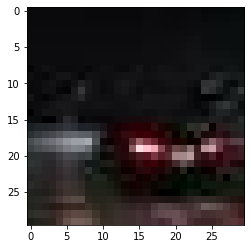

In [11]:
print(y.iloc[400])

plt.imshow(X.iloc[400].values.astype(np.int).reshape(30,30,3))
plt.show()

# II. Data Preprocessing

* To array & object to float

In [12]:
AR = DF.values

AR

array([[230, 236, 252, ..., 54, 52, 'G80스포츠'],
       [235, 238, 243, ..., 123, 118, 'G80스포츠'],
       [94, 112, 134, ..., 91, 95, 'G80스포츠'],
       ...,
       [132, 133, 128, ..., 160, 161, '팰리세이드'],
       [97, 104, 97, ..., 178, 175, '팰리세이드'],
       [57, 58, 53, ..., 158, 150, '팰리세이드']], dtype=object)

In [13]:
AR_X = AR[:,0:-1]
AR_y = AR[:,-1]

AR_X.shape, AR_y.shape

((24916, 2700), (24916,))

* One Hot Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE

array([ 0,  0,  0, ..., 33, 33, 33])

In [15]:
import tensorflow as tf

AR_yOHE = tf.keras.utils.to_categorical(AR_yLBE)

AR_yOHE

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

* Train & Test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE,
                                                    test_size = 0.3,
                                                    random_state = 2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17441, 2700), (7475, 2700), (17441, 34), (7475, 34))

* reshape & normalization


In [17]:
X_train = X_train.reshape((17441, 30, 30, 3))
X_test = X_test.reshape((7475, 30, 30, 3))

In [19]:
print(X_train[0])

[[[101 92 85]
  [99 92 84]
  [99 92 86]
  ...
  [108 105 100]
  [106 102 99]
  [115 111 108]]

 [[107 98 89]
  [98 89 80]
  [101 94 86]
  ...
  [126 123 118]
  [124 120 117]
  [126 122 119]]

 [[102 94 81]
  [96 88 75]
  [99 93 81]
  ...
  [110 109 104]
  [111 110 105]
  [107 106 101]]

 ...

 [[75 74 70]
  [75 74 70]
  [75 74 70]
  ...
  [111 105 91]
  [111 103 90]
  [106 97 82]]

 [[71 70 65]
  [72 71 66]
  [72 71 66]
  ...
  [79 73 59]
  [88 80 67]
  [99 92 76]]

 [[69 68 63]
  [69 68 63]
  [70 69 64]
  ...
  [64 61 46]
  [59 51 38]
  [59 52 36]]]


In [20]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


* ImageDataGenerator

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size = 0.2,
                                                    random_state = 2045)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((13952, 30, 30, 3), (3489, 30, 30, 3), (13952, 34), (3489, 34))

In [22]:
from keras.preprocessing.image import ImageDataGenerator 

# With Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range = 40, 
                                   width_shift_range = 0.2, 
                                   height_shift_range = 0.2, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip=True, 
                                   vertical_flip = True, 
                                   fill_mode = 'nearest')

# Without Augmentation
val_datagen = ImageDataGenerator(rescale = 1./255) 

# With Augmentation
train_generator = train_datagen.flow( 
    X_train,
    y = y_train,
    batch_size = 20,
    shuffle = True)

# Without Augmentation
val_generator = val_datagen.flow( 
    X_val,
    y = y_val,
    batch_size = 20, 
    shuffle = True)

# III. Modeling

* Model define

In [23]:
from keras import layers 
from keras import models

#익숙한 Sequential 모델로
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


model.add(layers.Flatten()) #한줄로 편다
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(units=34, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

* Model compile

In [24]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

* Model fit

In [30]:
%%time

Hist_model = model.fit(train_generator,
                       steps_per_epoch = 100, 
                       epochs = 500,
                       validation_data = val_generator, 
                       validation_steps = 50)

Epoch 1/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2305 - accuracy: 0.2870 - val_loss: 2.8038 - val_accuracy: 0.2210
Epoch 2/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2870 - accuracy: 0.2725 - val_loss: 2.8565 - val_accuracy: 0.2170
Epoch 3/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2618 - accuracy: 0.2695 - val_loss: 3.0177 - val_accuracy: 0.1870
Epoch 4/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2601 - accuracy: 0.2795 - val_loss: 2.5368 - val_accuracy: 0.2230
Epoch 5/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2570 - accuracy: 0.2940 - val_loss: 2.3602 - val_accuracy: 0.2830
Epoch 6/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2077 - accuracy: 0.2805 - val_loss: 2.5732 - val_accuracy: 0.2410
Epoch 7/500
100/100 [==============================] - 1s 14ms/step - loss: 2.2457 - accuracy: 0.2990 - val_loss: 2.5666 - val_accuracy:

# IV. Result Visualization

* Accuracy Visualization

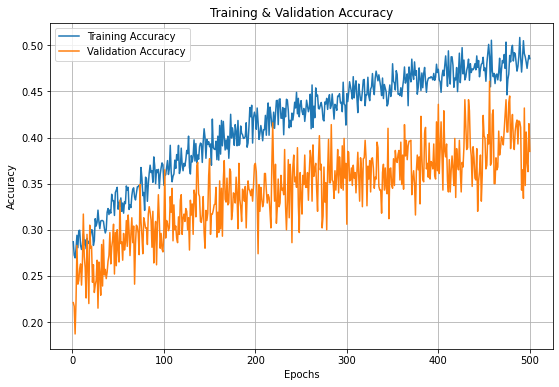

In [31]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['accuracy']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_model.history['accuracy'])
plt.plot(epochs, Hist_model.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()
#이전 CNN 모델에서 val_accuracy가 62%정도 나와서, image Augmentaion을 사용해 보았다.
#기존 accuracy를 넘어서지는 못했지만 계속 좋아지고 있다. epoch를 더 많이 돌리면 더 좋아질 것 같다

* Model Evaluate

In [32]:
test_datagen = ImageDataGenerator(rescale = 1./255) 

test_generator = test_datagen.flow(
    X_val,
    y = y_val,
    batch_size = 20, 
    shuffle = True)

In [33]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 0s 3ms/step - loss: 2.3176 - accuracy: 0.3820
Loss = 2.31765
Accuracy = 0.38200


* Capacity Visualization

In [34]:
#한글폰트
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -/.cache/matplotlib -rf

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:15 http://archive.ubuntu.com/ubuntu bionic

In [35]:
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'NanumBarunGothic')

import matplotlib.font_manager as fm 

fm._rebuild()

In [ ]:
X_test = X_test.astype(float) / 255 #시각화를 위해 다시 적용

In [39]:
import numpy as np

CLASSES = np.array(['G80스포츠', 'G90', 'KONA 1', 'i30', '그랜저', '그랜저 IG', '그랜저HG240', 
                    '더뉴그랜드스타렉스', '더뉴아반떼AD', '맥스크루즈', '벨로스터', '소나타', '소나타 LF', 
                    '소나타 LPI', '소나타 NF', '소나타 YF', '소나타 뉴라이즈', '소나타 하이브리드', '스타렉스', 
                    '싼타페', '아반떼 XD', '아반떼AD', '아반떼MD', '아슬란', '아이오닉 일렉트릭', '아이오닉 하이브리드', 
                    '에쿠스', '엑센트', '제네시스 G70', '제네시스 G80', '제네시스G380', '투싼', '투싼1', '팰리세이드'])

preds = model.predict(X_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)] 
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

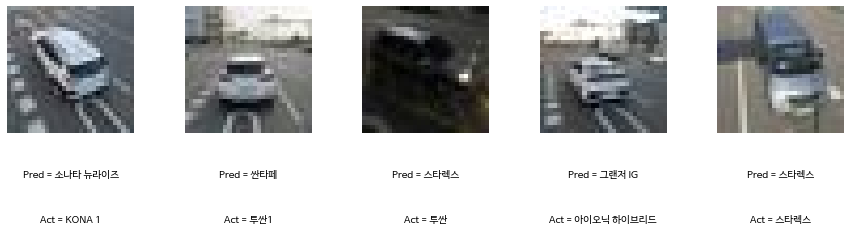

In [40]:
import matplotlib.pyplot as plt

n_to_show = 5
indices = np.random.choice(range(len(X_test)), n_to_show)

fig = plt.figure(figsize = (15, 3)) 
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, idx in enumerate(indices): 
  img = X_test[idx] 
  ax = fig.add_subplot(1, n_to_show, i + 1) 
  ax.axis('off') 
  ax.text(0.5, -0.35, 
          'Pred = ' + str(preds_single[idx]), 
          fontsize = 10, 
          ha = 'center',
          transform = ax.transAxes)
  ax.text(0.5, -0.7, 
          'Act = ' + str(actual_single[idx]), 
          fontsize = 10, 
          ha = 'center',
          transform = ax.transAxes) 
  ax.imshow(img)

  #한글처리 할 것

본 내용은 2021/03/24(수)에 학습한 내용입니다.